<a href="https://colab.research.google.com/github/HassanJoy/Python/blob/main/CHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


Initially, I have loaded all the libraries :
- to load the dataset.
- to preprocess the data.
- to do data analysis & visualization


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [ ]:
#load dataset 
df=pd.read_csv('/content/drive/MyDrive/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#remove all duplicate value
df.drop_duplicates(inplace = True)
#drop null values rows
df=df.dropna()
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


**Data Preprocessing**

Expalin:

1.  There are 4023 samples and 16 columns
2.  6 numerical and 11 categorical


In [ ]:
df.drop(['education', 'diabetes', 'BPMeds'],axis=1, inplace=True)
print('Shape: ',df.shape)
print('Columns: ',df.columns)
df

Shape:  (4238, 13)
Columns:  Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'prevalentStroke',
       'prevalentHyp', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose', 'TenYearCHD'],
      dtype='object')


,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0,1,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   totChol          4188 non-null   float64
 7   sysBP            4238 non-null   float64
 8   diaBP            4238 non-null   float64
 9   BMI              4219 non-null   float64
 10  heartRate        4237 non-null   float64
 11  glucose          3850 non-null   float64
 12  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(6)
memory usage: 430.5 KB


**Exploratory Data** **Analysis**

In [ ]:
df.describe()

,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,0.489059,9.022155,0.005744,0.311543,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,0.499949,11.918869,0.075581,0.463187,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,1.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
def fig (df,var):
    fig2 = px.histogram(df,x=var,color=var,template='plotly_dark')
    fig2.show()


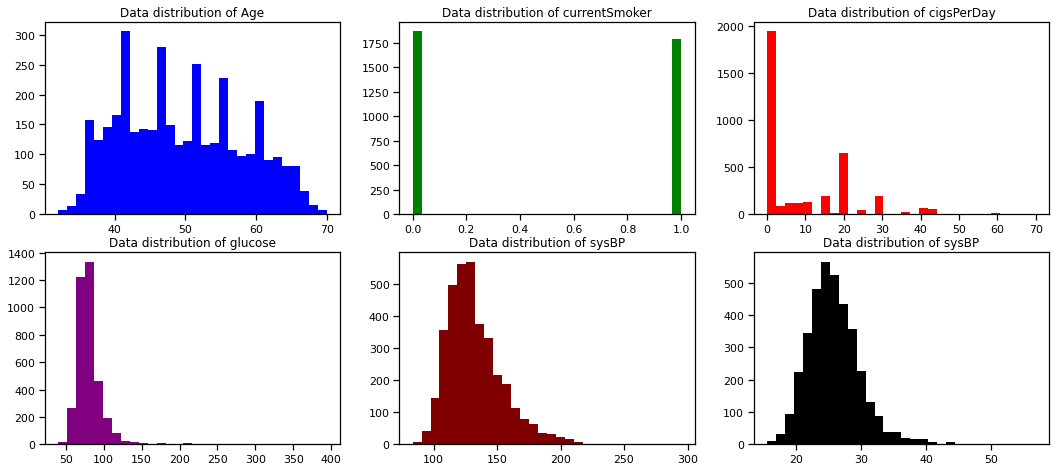

In [ ]:
plt.figure(figsize=(18,12))

plt.subplot(3,3,1);
plt.hist(df['age'], bins=30, color='blue')
plt.title("Data distribution of Age");

plt.subplot(3,3,2);
plt.hist(df['currentSmoker'], bins=30, color='green')
plt.title("Data distribution of currentSmoker");

plt.subplot(3,3,3);
plt.hist(df['cigsPerDay'], bins=30, color='red')
plt.title("Data distribution of cigsPerDay");

plt.subplot(3,3,4);
plt.hist(df['glucose'], bins=30, color='purple')
plt.title("Data distribution of glucose");


plt.subplot(3,3,5);
plt.hist(df['sysBP'], bins=30, color='Maroon')
plt.title("Data distribution of sysBP");

plt.subplot(3,3,6);
plt.hist(df['BMI'], bins=30, color='Black')
plt.title("Data distribution of sysBP");


plt.show()

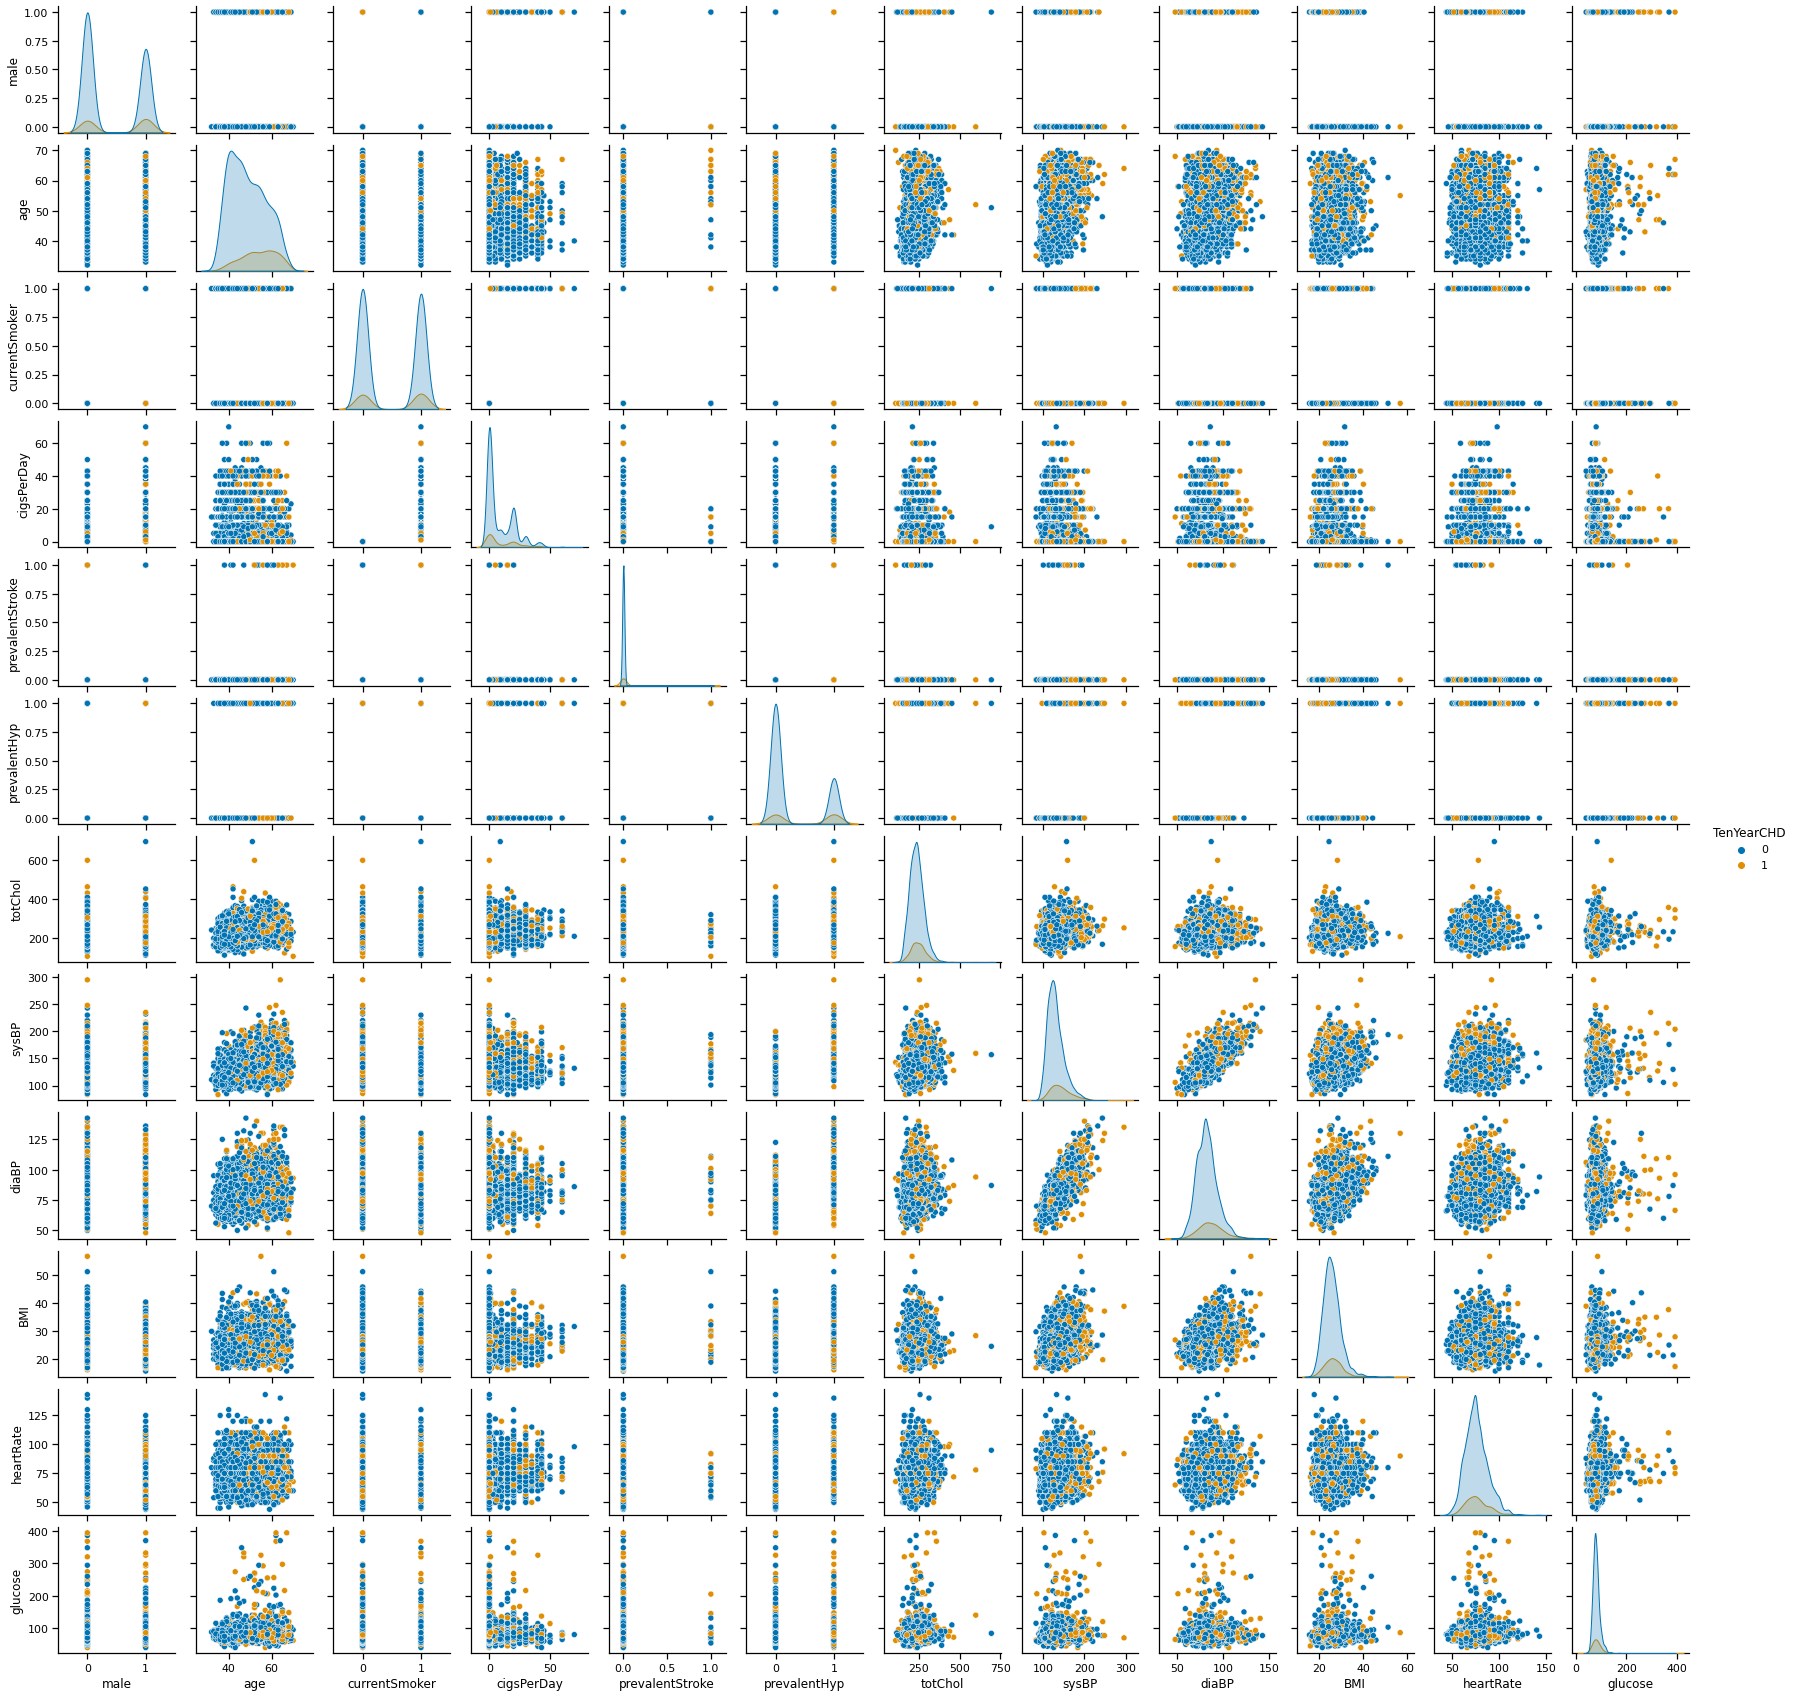

In [ ]:
sns.pairplot(df, hue="TenYearCHD", height = 2, palette = 'colorblind');

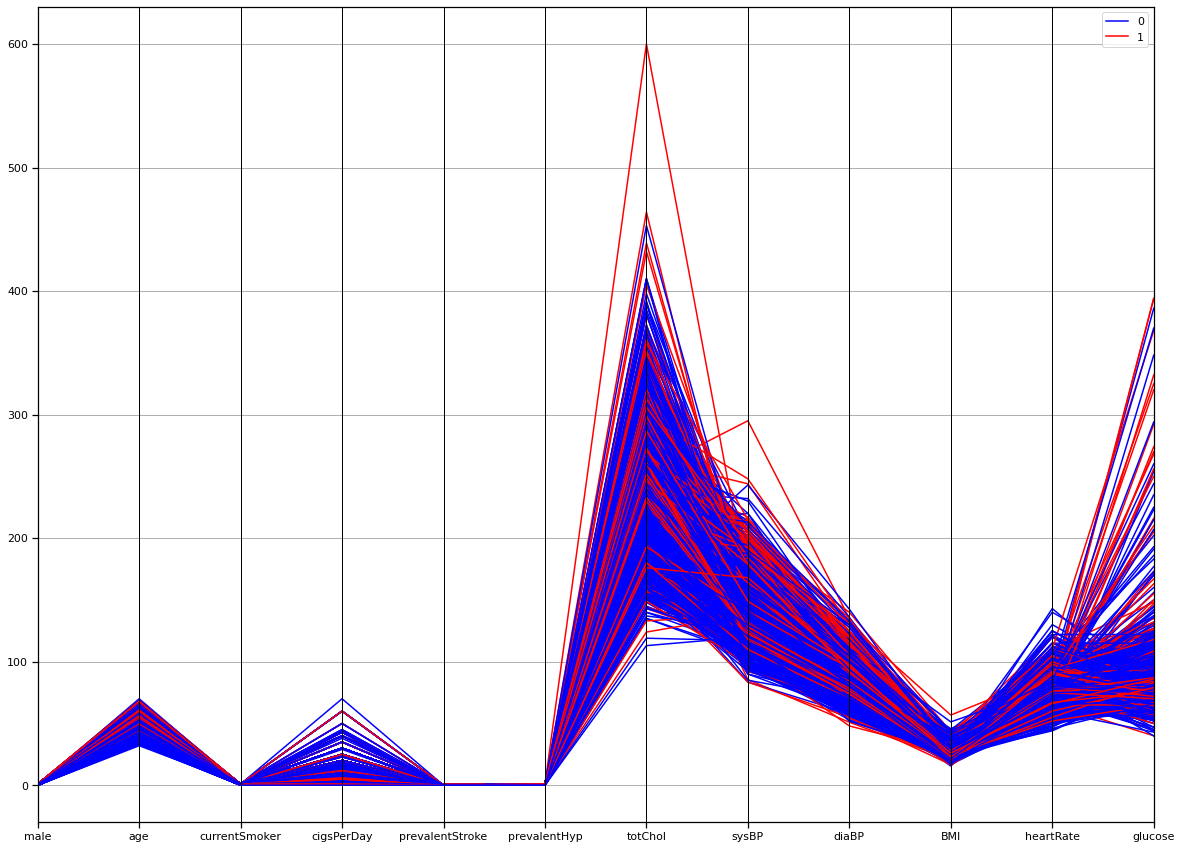

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(20,15))
parallel_coordinates(df, "TenYearCHD", color = ['blue', 'red']);

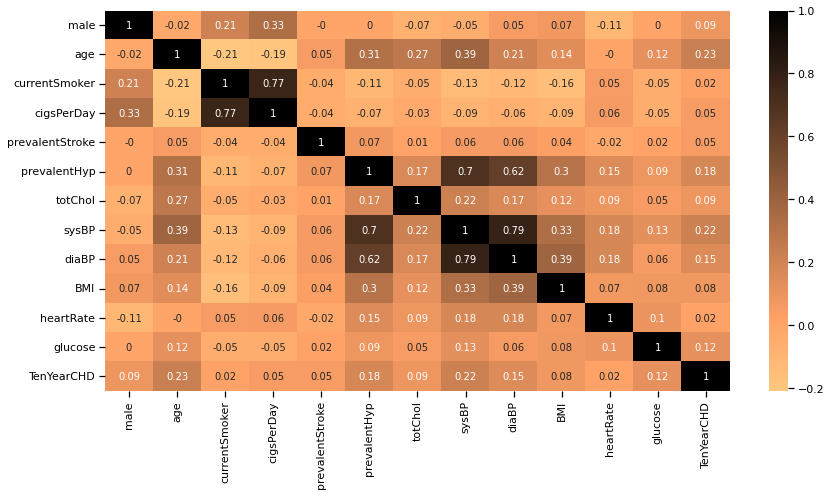

In [ ]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'copper_r')

In [ ]:
#df1=df.copy()
# We want to convert the non-numeric values of each column into numbers so that it can be processed
#le=LabelEncoder()
#for i in df1.columns:
 # df1[i]=le.fit_transform(df1[i])
#df1

In [ ]:
#temp = df1.describe()
#temp.style.background_gradient(cmap='Oranges')

**Model development**: 

In [ ]:
#df1=df.copy()
#feature matrix
#X=df1.values

X =df[['currentSmoker', 'prevalentStroke', 'BMI', 'glucose','cigsPerDay','prevalentHyp','heartRate','age']]
X
y = df['TenYearCHD']
#Target value
#y=df.pop('TenYearCHD').values

**Data** **Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2742, 8)
X_test shape:  (914, 8)
y_train shape:  (2742,)
y_test shape:  (914,)


**Support Vector Machine (SVM)** **Algorithm**

In [ ]:

# importing the necessary package to use the classification algorithm
from sklearn import metrics
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset
y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")
# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.8457
----------------------------------


**Decision Tree (DT) Algorithm**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.7429
---------------------------------


**K nearest neighbours (KNN) Algorithm**

In [ ]:
# KNn

# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.8107
----------------------------------


**Gaussian Naive Bayes (NB) Algorithm**

In [ ]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.8326
---------------------------------


**Logistic Regression (LR) Algorithm**

In [ ]:
#Logistics Regression

# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.8414
---------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model_name=[]

result=[]

for i in score:
  model_name.append(i[0])
  result.append(i[1])
  model_result = pd.DataFrame({'model_name': model_name,
                               'result': result})
print(model_result)

  model_name  result
0        KNN  0.8107
1         NB  0.8326
2         DT  0.7429
3        SVM  0.8457
4         LR  0.8414


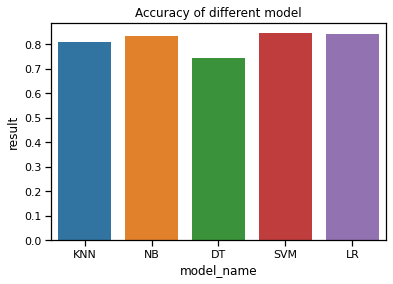

In [ ]:
sns.set_context("notebook")
bar_plot = sns.barplot(x='model_name', y='result', data=model_result)
bar_plot.set_title("Accuracy of different model");

**Comparisons**

We can see from our selected features different models produce different accuracy.

Sometimes by changing value of random_state parameter the accuracy of the model can be increace 0.01% or more.

SVM has the highest accuracy almost 85%

DT has the lowest accuracy 74%

**Conclusion**

My project on predicting heart disease, from data collecting to model building, has been successfully completed. I have performed data cleaning, exploratory data analysis to choose the best feature for the model, model construction, comparison of the accuracy of various models, and performance evaluation of various models for various features. Performance of models is influenced by characteristics.
